# **BIG MART SALES EDA**

- 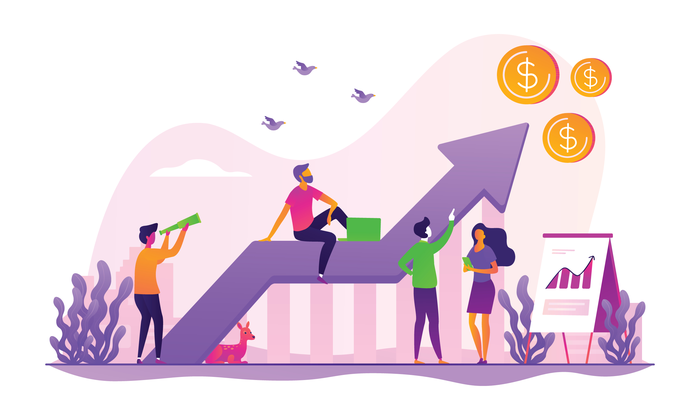

## **Dataset**

- Item_Identifier : Unique product ID
- Item_Weight : Weight of product
- Item_Fat_Content : Whether the product is low fat or not
- Item_Visibility : The % of total display area of all products in a store allocated to the particular product
- Item_Type : The category to which the product belongs
- Item_MRP : Maximum Retail Price (list price) of the product
- Outlet_Identifier : Unique store ID
- Outlet_Establishment_Year : The year in which store was established
- Outlet_Size : The size of the store in terms of ground area covered
- Outlet_Location_Type : The type of city in which the store is located
- Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales : Sales of the product in the particular store

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math

## **1) Data Exploration**

*Loading the dataset in a dataframe and making its copy so that we don't loose the orignal data.*

In [3]:
# Loading the data in a dataframe

train = pd.read_csv("Train.csv")

In [4]:
# Making a copy of orignal dataset

train_original=train.copy()

In [6]:
# View top 5 rows

train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# View last 5 rows

train.tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [8]:
# Checking the no of rows and columns

train.shape

(8523, 12)

*The dataset contains 8523 rows and 12 columns(features)*

In [9]:
# Basic information about dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
# Checking for NULL(Missing) values

train.isnull().values.any()

True

In [11]:
# Finding the null values

null_values = train.isnull().sum().sort_values(ascending=False)
null_values

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# Finding the Missing values %

null_values/train.shape[0] *100

Outlet_Size                  28.276428
Item_Weight                  17.165317
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

*We can observe that we are having:*
- *2410 (28% ) missing values in the Outlet_Size feature which is a categorical feature.*
- *1463(17%) missing values in the Item_Weight feature which is a numerical feature.*

In [13]:
# Statiscal Summary

train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## **2) Data Cleaning**

**Handling Missing Values**

*1) Item Weight*

In [14]:
train['Item_Weight'].isnull().sum()

1463

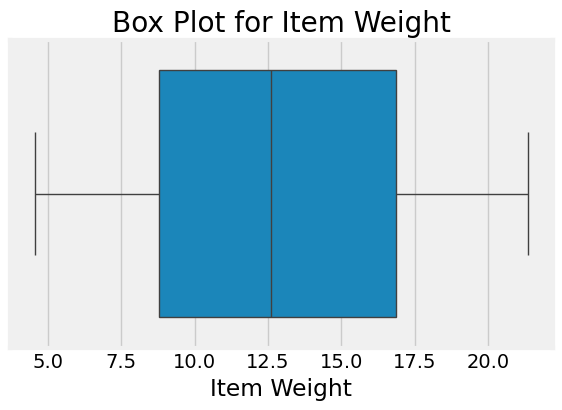

In [15]:
plt.figure(figsize=(7,4))
plt.style.use('fivethirtyeight')

sns.boxplot(x=train['Item_Weight'], data=train)

plt.xlabel('Item Weight')
plt.title('Box Plot for Item Weight')
plt.show()

*The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean" values.*

In [16]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [17]:
train['Item_Weight'].isnull().sum()

0

*We have succesfully imputed the missing values for 'Item_Weight' column.*

2) Outlet Size

In [18]:
train['Outlet_Size'].isnull().sum()

2410

In [19]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

*Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.*

In [20]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [21]:
train['Outlet_Size'].isnull().sum()

0

*We have succesfully imputed the missing values for 'Outlet Size' column.*

In [22]:
# Checking for any null value in dataframe

train.isnull().values.any()

False

**Checking categorical columns for any discrepancy**

In [23]:
train['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [24]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

*We find some irregularities in this column*

In [25]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

C:\Users\shaid\AppData\Local\Temp\ipykernel_5480\197664694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)


In [26]:
train['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [27]:
train['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [28]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [29]:
train['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [30]:
train['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

- *We will convert "Outlet_Establishment_Year" to get the age of store to get more meaningful information and delete the "Outlet_Establishment_Year" column*

In [31]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2024 - x)
del train['Outlet_Establishment_Year']

## **3) Exploratory Data Analysis and Visual Insights**

In [32]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Years_Established'],
      dtype='object')

In [33]:
train.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
6994,FDK22,12.857645,Low Fat,0.025960,Snack Foods,214.8850,OUT027,Medium,Tier 3,Supermarket Type3,4976.8550,39
1513,FDV52,20.700000,Regular,0.122208,Frozen Foods,119.7466,OUT017,Medium,Tier 2,Supermarket Type1,4006.7844,17


### **3.1 Univariate Analysis**

**3.1.1 Target Variable - Item Outlet Sales**

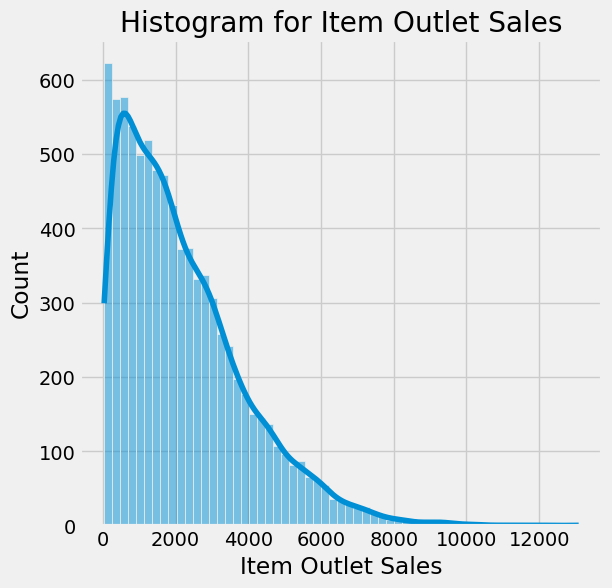

In [34]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.histplot(train['Item_Outlet_Sales'], kde=True)

plt.xlabel('Item Outlet Sales')
plt.title('Histogram for Item Outlet Sales')
plt.show()

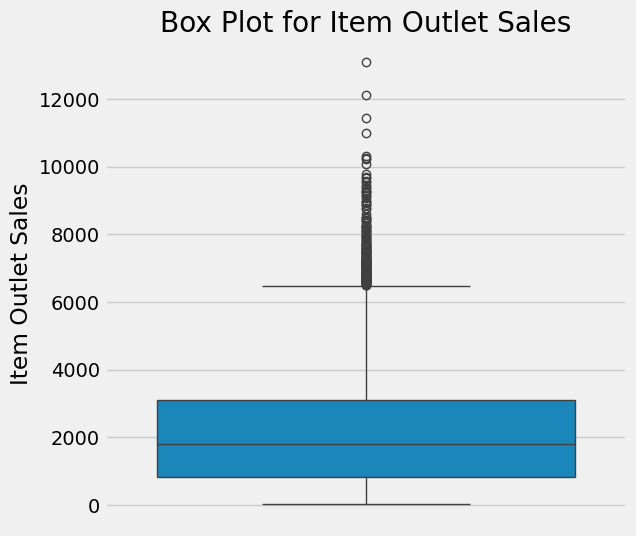

In [35]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.boxplot(train['Item_Outlet_Sales'])

plt.ylabel('Item Outlet Sales')
plt.title('Box Plot for Item Outlet Sales')
plt.show()

**3.1.2 Independent Variables (Numerical Features)**

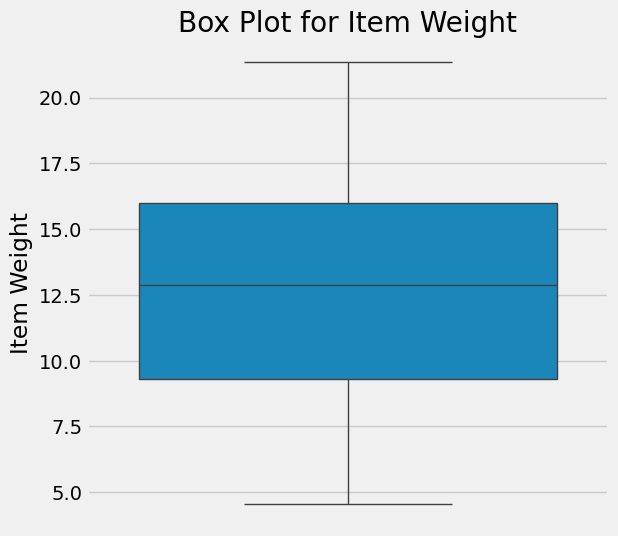

In [36]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.boxplot(data=train, y='Item_Weight')

plt.ylabel('Item Weight')
plt.title('Box Plot for Item Weight')
plt.show()

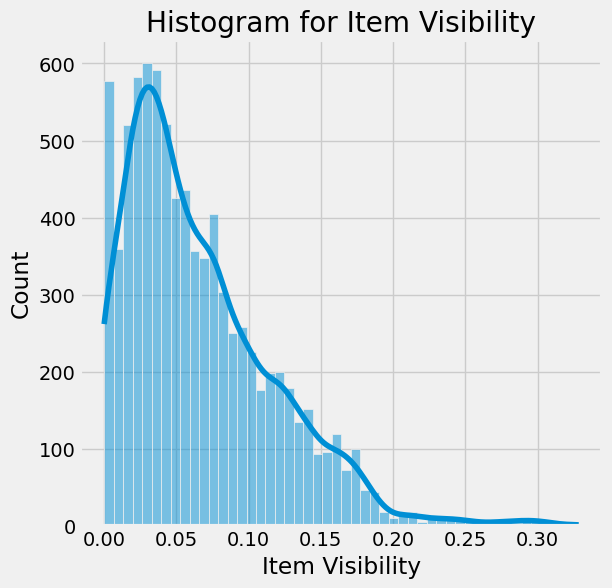

In [37]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.histplot(data=train, x='Item_Visibility', kde=True)

plt.xlabel('Item Visibility')
plt.title('Histogram for Item Visibility')
plt.show()

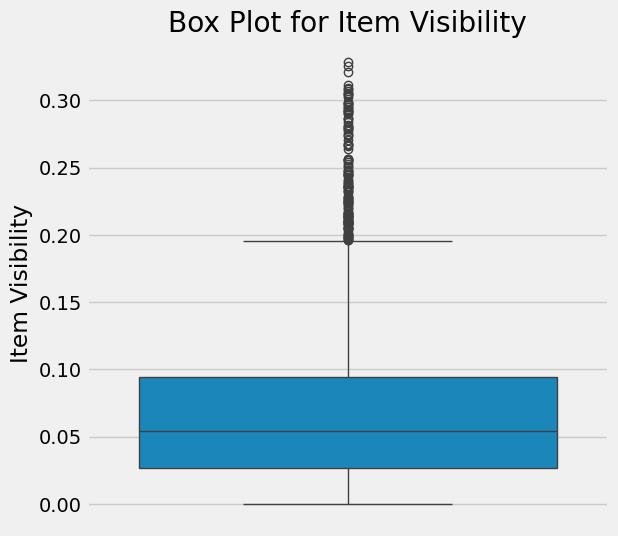

In [38]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.boxplot(data=train, y='Item_Visibility')

plt.ylabel('Item Visibility')
plt.title('Box Plot for Item Visibility')
plt.show()

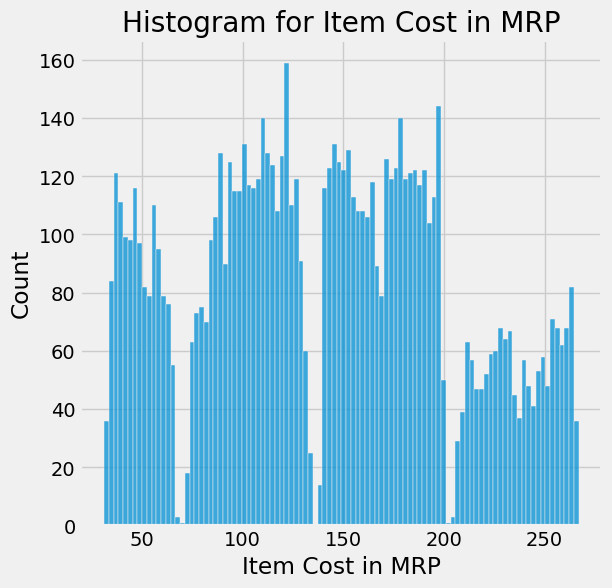

In [39]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.histplot(data=train, x='Item_MRP', kde=False, bins=100)

plt.xlabel('Item Cost in MRP')
plt.title('Histogram for Item Cost in MRP')
plt.show()

**Observations:**
- Item_Outlet_Sales feature is right skewed and it has outliers.
- Item weight has no outliers
- Item_Visibility is right-skewed and has outliers
- We can clearly see 4 different distributions for Item_MRP.

**3.1.3 Independent Variables (Categorical Features)**

<Figure size 600x600 with 0 Axes>

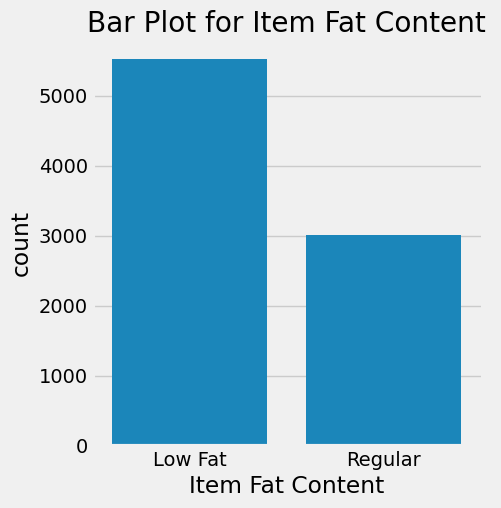

In [41]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.catplot(x="Item_Fat_Content", kind="count", data=train)

plt.xlabel('Item Fat Content')
plt.title('Bar Plot for Item Fat Content')
plt.show()

<Figure size 600x600 with 0 Axes>

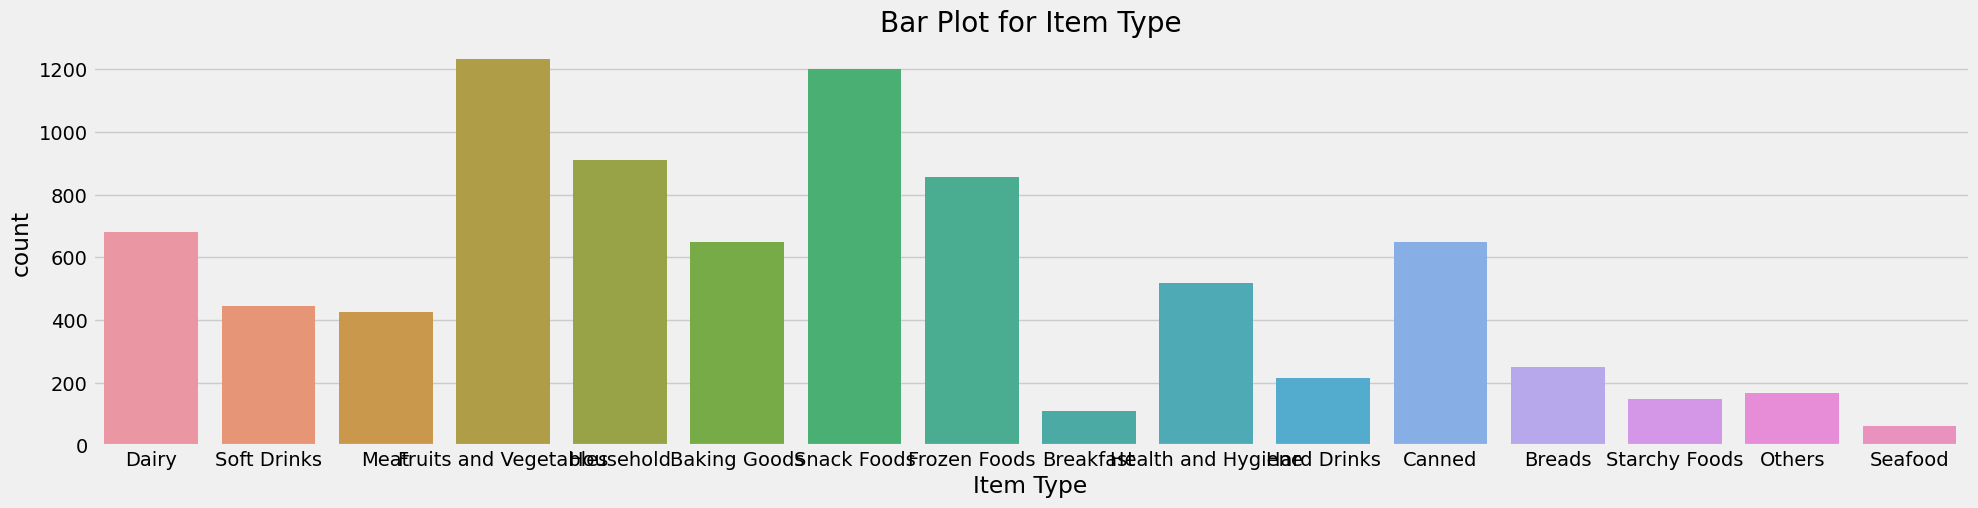

In [40]:
plt.figure(figsize=(6,6))

sns.catplot(x='Item_Type', kind='count', data=train, aspect=4)

plt.xlabel('Item Type')
plt.title('Bar Plot for Item Type')
plt.show()

<Figure size 600x600 with 0 Axes>

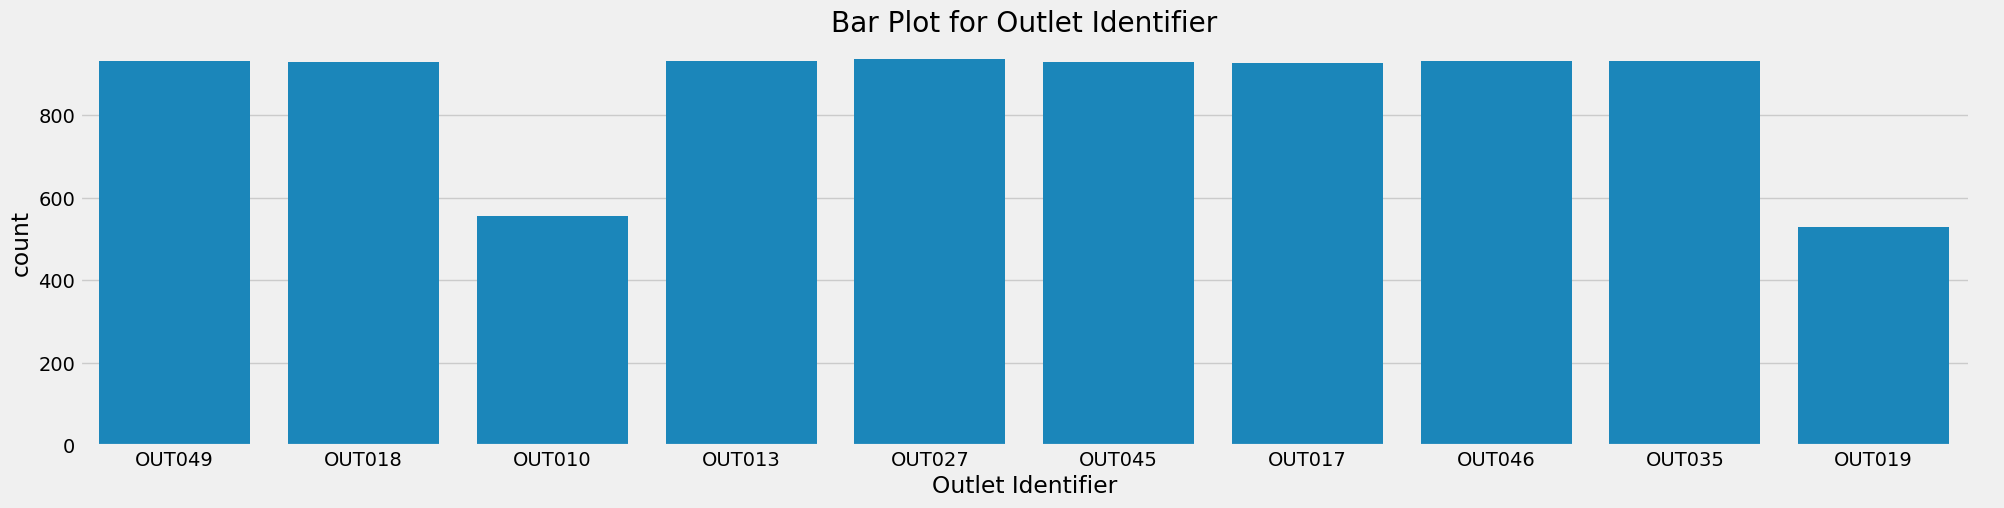

In [42]:
plt.figure(figsize=(6,6))
plt.style.use("fivethirtyeight")
sns.catplot(x='Outlet_Identifier', kind='count', data=train, aspect=4)

plt.xlabel('Outlet Identifier')
plt.title('Bar Plot for Outlet Identifier')
plt.show()

<Figure size 600x600 with 0 Axes>

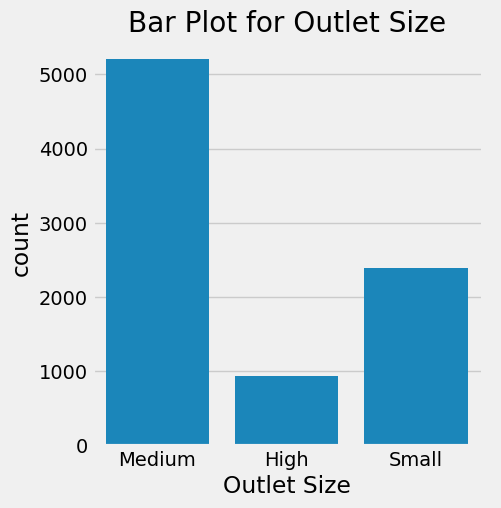

In [43]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.catplot(x='Outlet_Size', kind='count', data=train)

plt.xlabel('Outlet Size')
plt.title('Bar Plot for Outlet Size')
plt.show()

<Figure size 600x600 with 0 Axes>

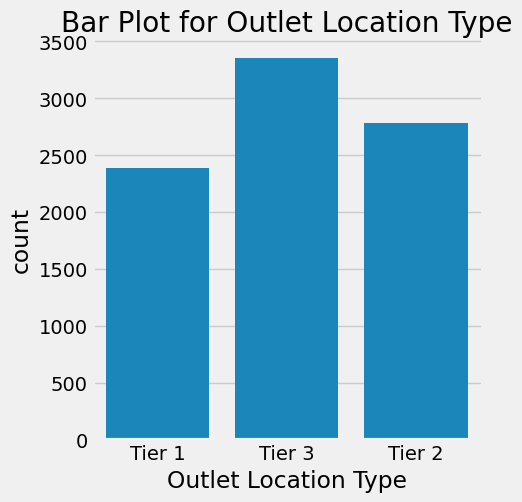

In [44]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.catplot(x='Outlet_Location_Type', data=train, kind='count')

plt.xlabel('Outlet Location Type')
plt.title('Bar Plot for Outlet Location Type')
plt.show()

<Figure size 600x600 with 0 Axes>

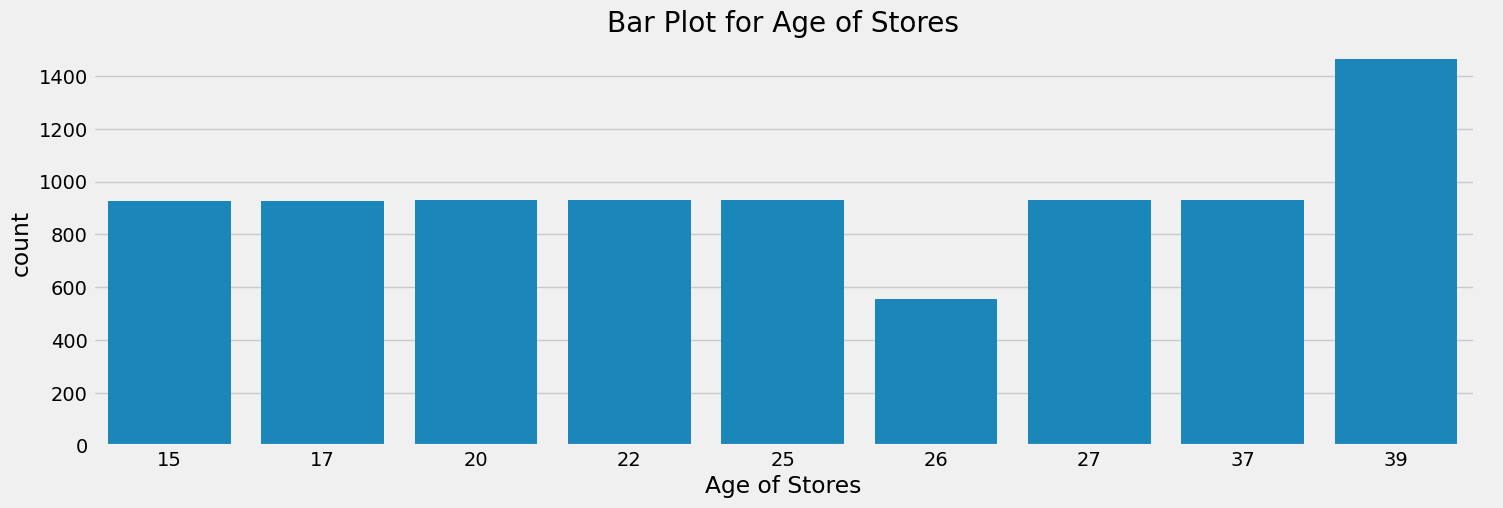

In [45]:
plt.figure(figsize=(6,6))

sns.catplot(x='Years_Established', kind='count', data=train, aspect=3)

plt.xlabel('Age of Stores')
plt.title('Bar Plot for Age of Stores')
plt.show()

<Figure size 600x600 with 0 Axes>

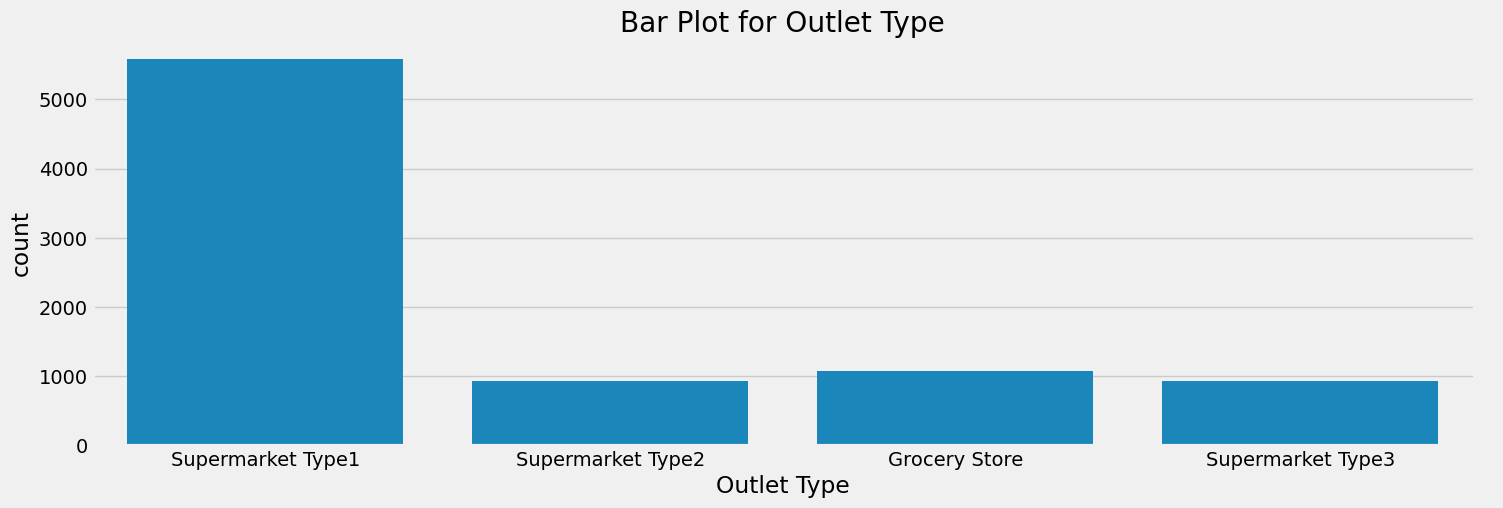

In [46]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.catplot(x='Outlet_Type', kind='count', data=train, aspect=3)

plt.xlabel('Outlet Type')
plt.title('Bar Plot for Outlet Type')
plt.show()

**Observations:**
- Low Fat content items are more than Regular Fat content.
- Fruits and Vgetables along with Snack Foods are maximum in qunatity.
- Top 5 Items
    - Fruits and Vegetables
    - Snack Foods
    - Household
    - Frozen Foods
    - Canned
- 10 unique outlets are present and OUT019 has the least presence.
- Maximum outlets are of Medium Size.
- Maximum Outets are from Tier 3 location.
- Almost equal presence of stores in terms of Age of stores, maximum stores are of 39 years old.
- Maimum outlets are of Suermarket Type 1.

### **3.2 Bivariate Analysis**

*Item Weight vs Item Outlet Sales*

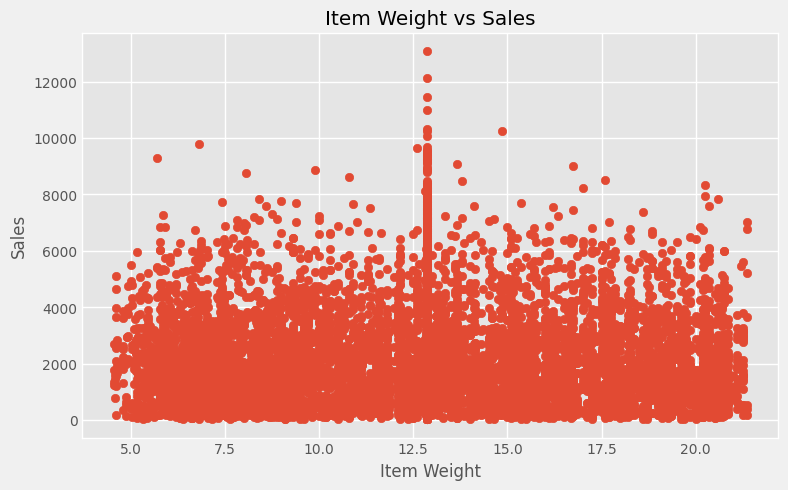

In [47]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')

plt.scatter(x='Item_Weight', y='Item_Outlet_Sales', data=train)

plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.title('Item Weight vs Sales')
plt.show()

*Item Visibility vs Item Outlet Sales*

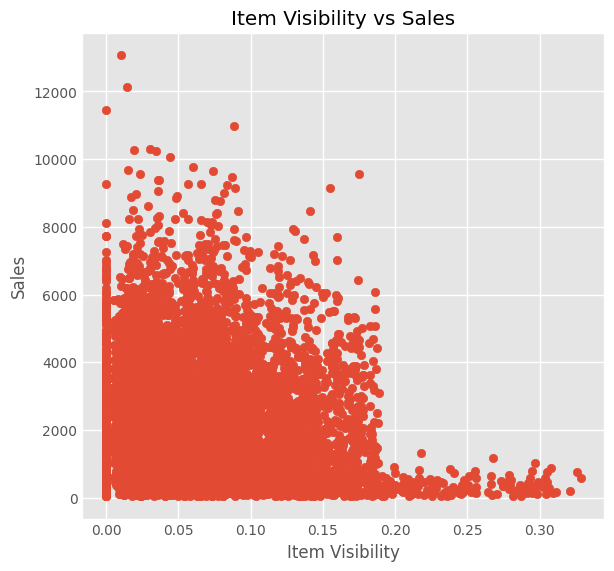

In [48]:
plt.figure(figsize=(6,6))
plt.style.use('fast')

plt.scatter(x='Item_Visibility', y='Item_Outlet_Sales', data=train)

plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.title('Item Visibility vs Sales')
plt.show()

**Observations:**
- Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

*Lets consider it like missing information and impute it with mean visibility of that product.*

In [49]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())

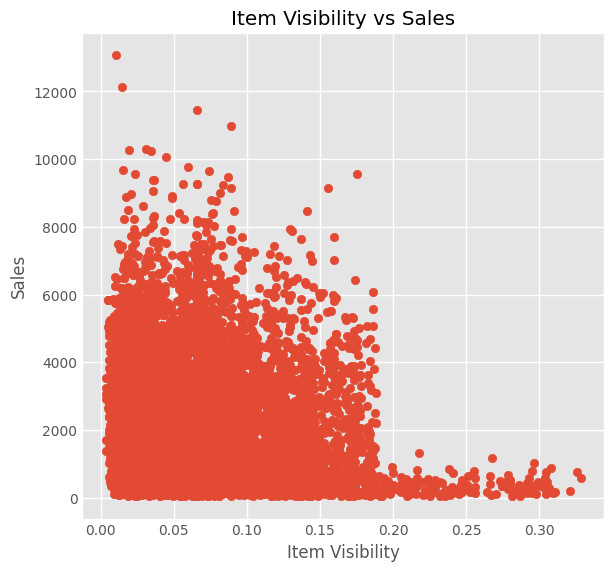

In [50]:
plt.figure(figsize=(6,6))
plt.scatter(x='Item_Visibility', y='Item_Outlet_Sales', data=train)

plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.title('Item Visibility vs Sales')
plt.show()

*We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.*

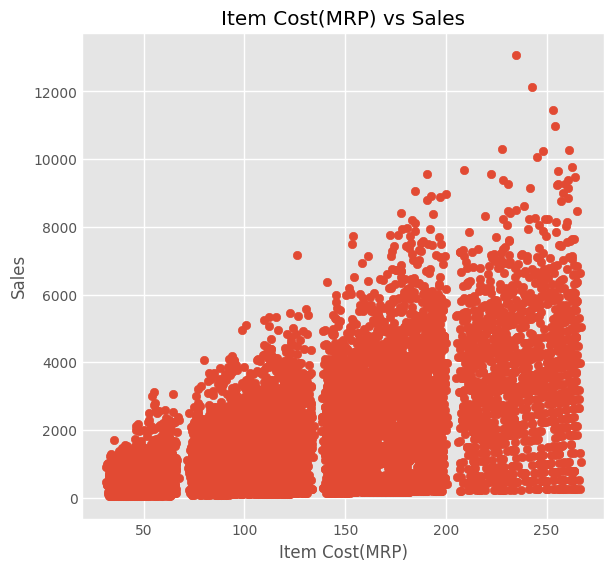

In [51]:
plt.figure(figsize=(6,6))
plt.style.use("ggplot")

plt.scatter(x='Item_MRP', y='Item_Outlet_Sales', data=train)

plt.xlabel('Item Cost(MRP)')
plt.ylabel('Sales')
plt.title('Item Cost(MRP) vs Sales')
plt.show()

C:\Users\shaid\AppData\Local\Temp\ipykernel_5480\472065816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train, palette='mako',errorbar=None)


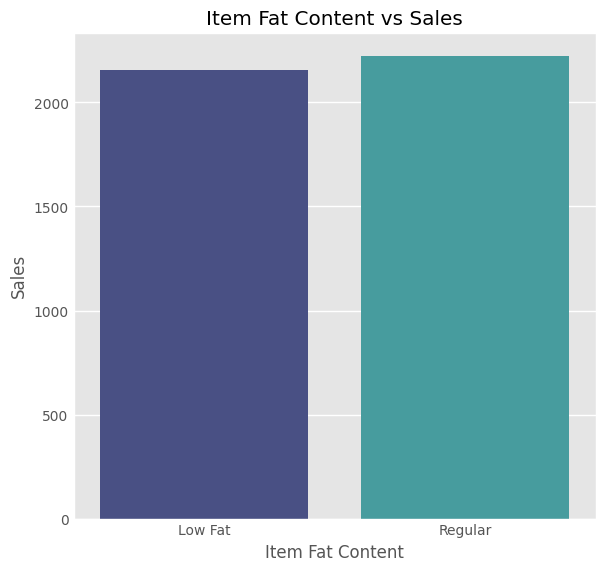

In [52]:
plt.figure(figsize=(6,6))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train, palette='mako',errorbar=None)

plt.xlabel('Item Fat Content')
plt.ylabel('Sales')
plt.title('Item Fat Content vs Sales')
plt.show()

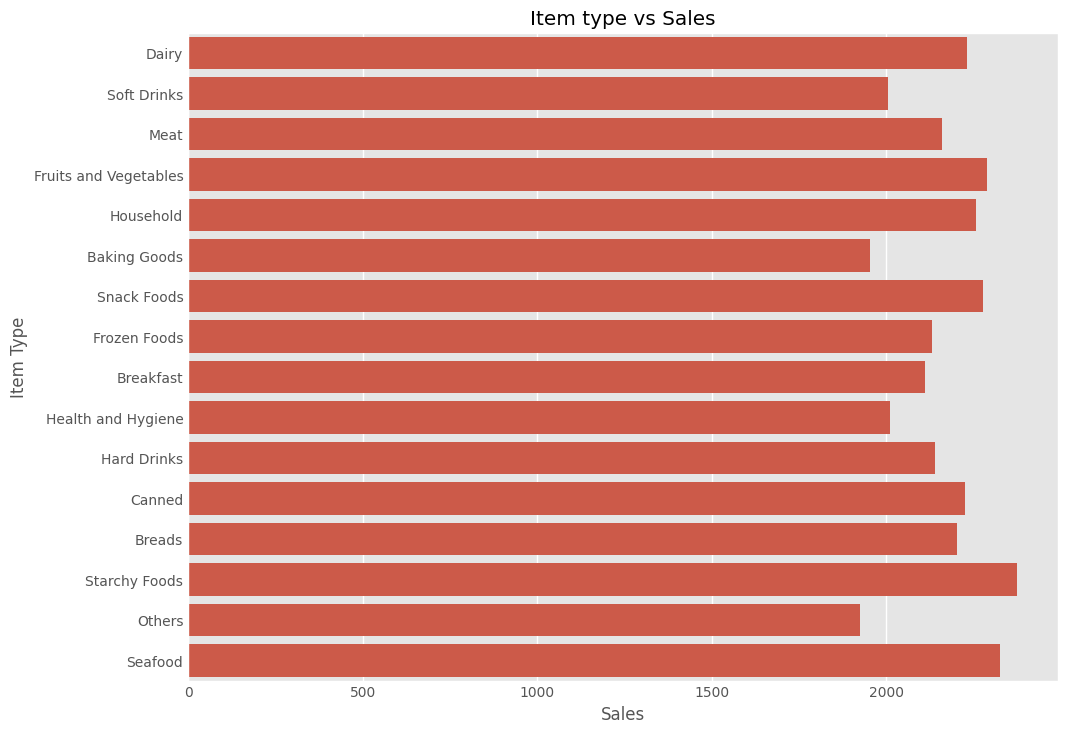

In [53]:
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=train, errorbar=None)

plt.xlabel('Sales')
plt.ylabel('Item Type')
plt.title('Item type vs Sales')
plt.show()

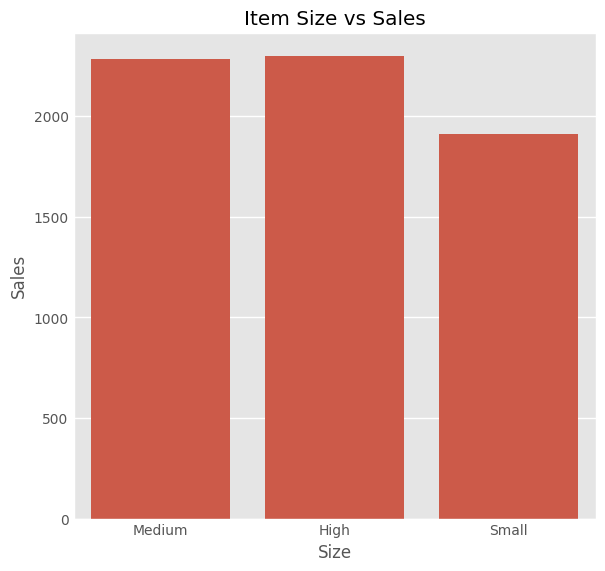

In [54]:
plt.figure(figsize=(6,6))
plt.style.use('fast')
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train, errorbar=None)

plt.xlabel('Size')
plt.ylabel('Sales')
plt.title('Item Size vs Sales')
plt.show()

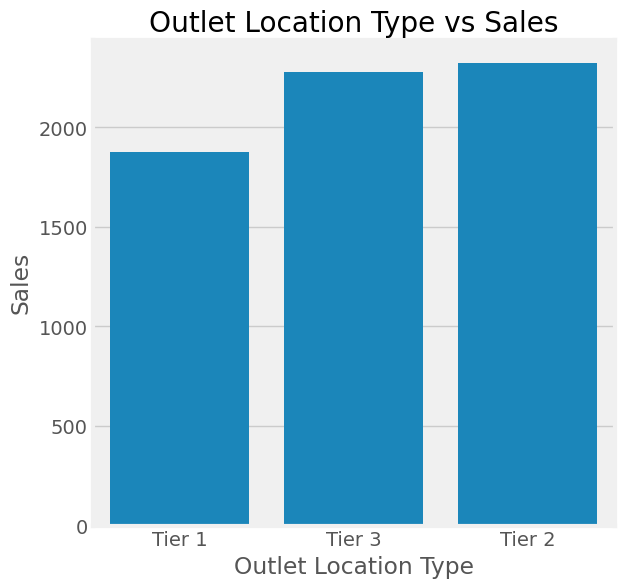

In [55]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train, errorbar=None)

plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')
plt.title('Outlet Location Type vs Sales')
plt.show()

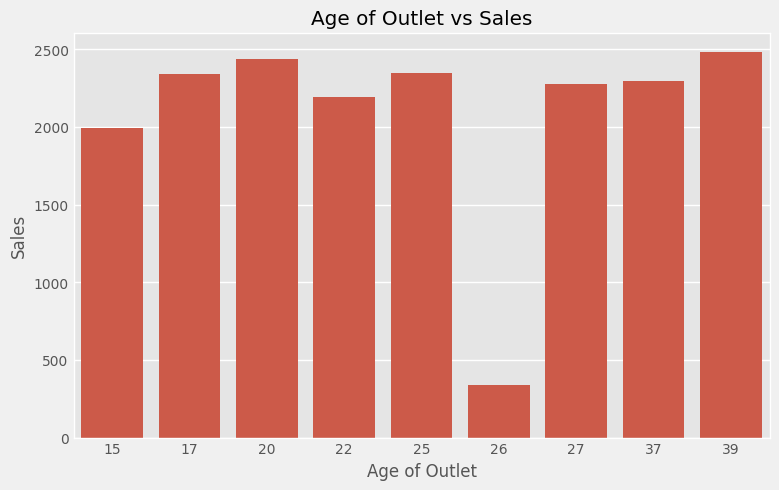

In [56]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x='Years_Established', y='Item_Outlet_Sales', data=train, errorbar=None)

plt.xlabel('Age of Outlet')
plt.ylabel('Sales')
plt.title('Age of Outlet vs Sales')
plt.show()

**Observations:**
- Sales is spread well across the entire range of the Item_Weight without any obvious pattern.
- In the plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices and Range of 200-250 is having highest Sales.
- Sales is almost equal in both categories of Fat content.
- Top 5 Items as per Sales
    - Starchy Foods
    - Fruits and Vegetables
    - Household
    - Snack Foods
    - Sea Food
- The sale could be imporved by increasing stock of Starchy Foods and Sea Food as rest 3 are already present in stores as Top 5 products by count 
- Sale is maximum at Medium and High Size Outlets so the sale can be boosted by increasing the number of High size outlets as presently we have maximum outlets of Medium size. 
- Tier 3 and Tier 2 give maximum sales so we can boost the sale by increasing outlets at Tier 2 location as presently we have maximum outlets at Tier 3 location.
- Age of Stores have less impact as the sales is same for almost all the stores except 2, the oldest store is having highest sales and another store established 26 years ago is having least sales.

### **3.3 Multivariate Analysis**

Item Type by Item Fat Content to Item Outlet Sales

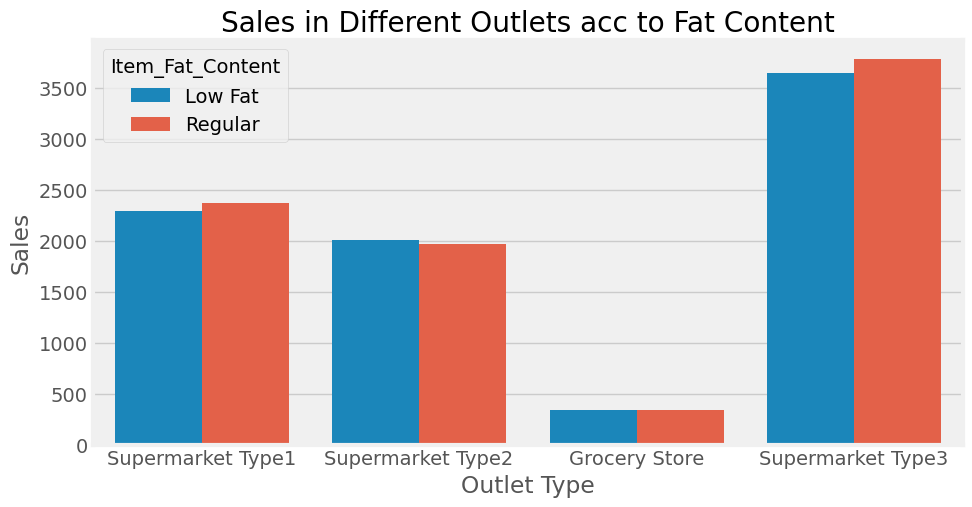

In [57]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=train, errorbar=None)

plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.title('Sales in Different Outlets acc to Fat Content')
plt.show()

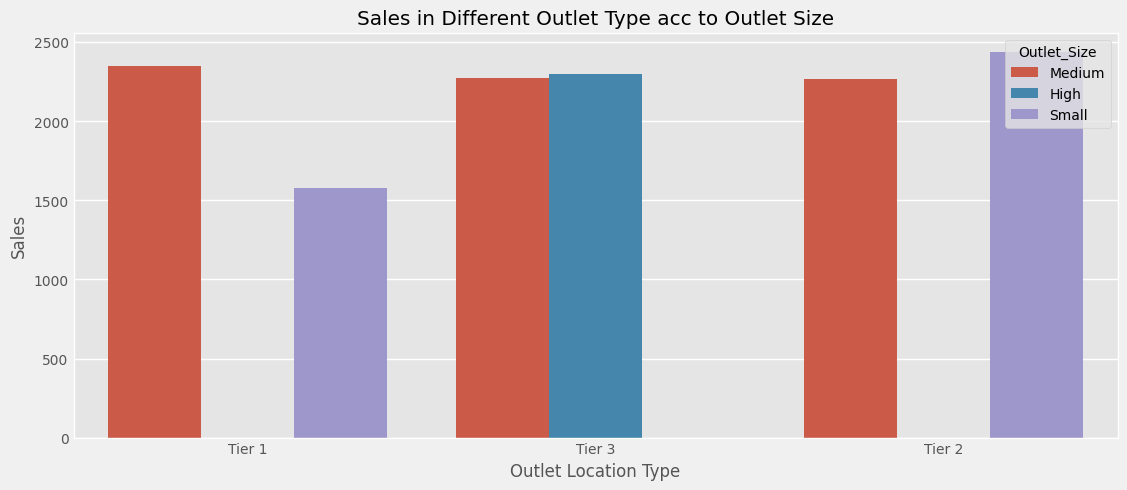

In [58]:
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=train, errorbar=None)

plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')
plt.title('Sales in Different Outlet Type acc to Outlet Size')
plt.show()

**Observations:**
- Sales accross Outlet Type is even for both the categories of Fat Content
- Tier 1 and Tier 2 dont have High Size outlets, we can boost the sales by increasing the no of High size outlets in these loctaions, esp Tier 2 as the sales are more in Tier 2 than Tier 1

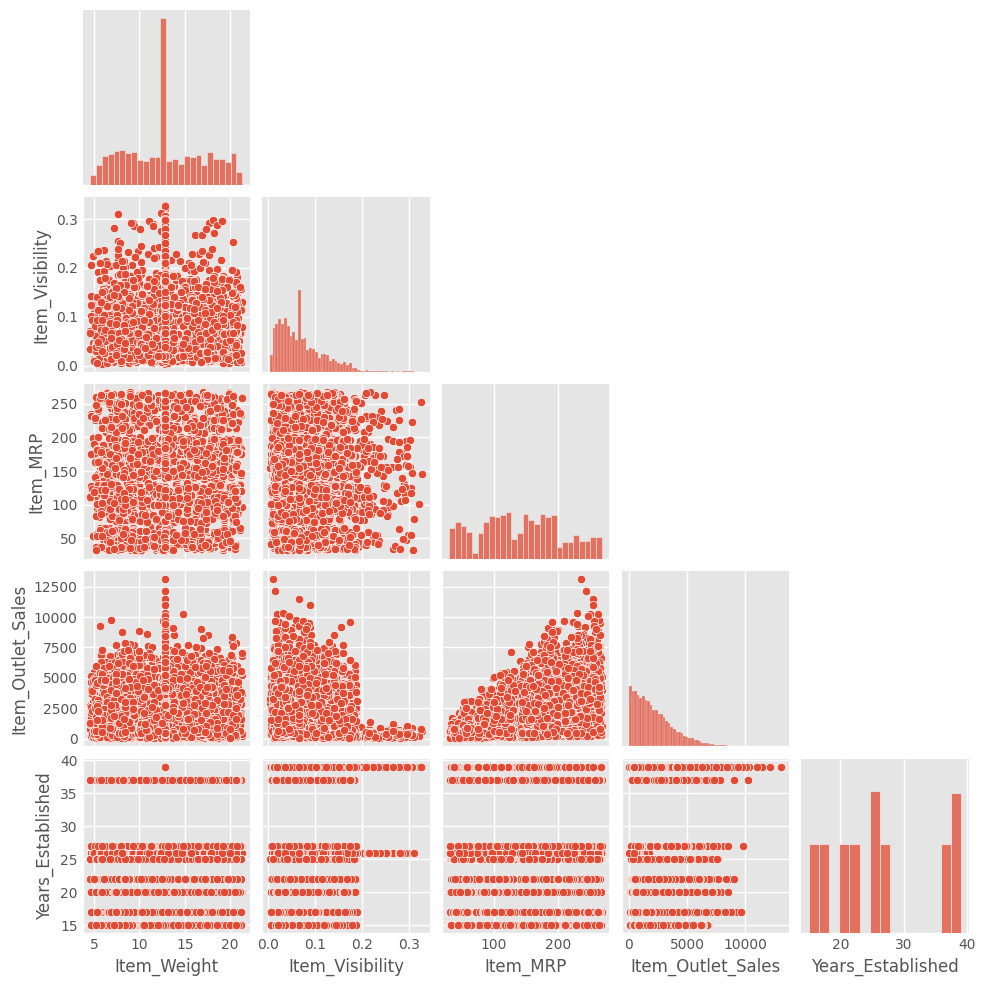

In [59]:
sns.pairplot(train, height=2,corner=True)
plt.show()

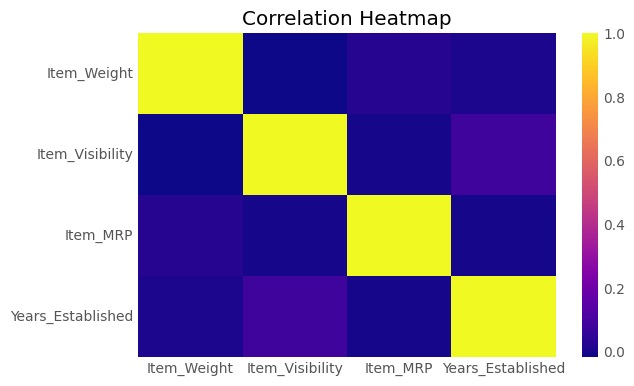

In [60]:
df_htmp = train.drop(columns=['Item_Outlet_Sales']).corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(df_htmp, cmap='plasma')
plt.title('Correlation Heatmap')
plt.show()

### Follow @ Shaid Hasan Shuvo